# IC50 exploration

This notebook demonstrates how to process plates associated to the paper [A SARS-CoV-2 cytopathicity dataset generated by high-content screening of a large drug repurposing collection](https://doi.org/10.1038/s41597-021-00848-4).
We explore the metadata linked to [idr0094-ellinger-sarscov2](https://idr.openmicroscopy.org/search/?query=Name:idr0094).

You can also explore the data and calculate the IC50 for each compound using the [Shiny app](https://binder.bioimagearchive.org/v2/gh/IDR/idr0094-ellinger-sarscov2/master?urlpath=shiny/apps/).
This notebook uses the Web API to load the data in R.

## Collect parameters

In [1]:
# Parameters:
screenId = 2603


### Load the libraries

In [2]:
# Load the libraries
suppressPackageStartupMessages(library(jpeg))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(drc))
library(jsonlite)

### URL used to load data 

In [3]:
THUMB_URL <- "https://idr.openmicroscopy.org/webgateway/render_thumbnail/"
TABLE_URL <- "https://idr.openmicroscopy.org/webgateway/table/Screen/"
WELLS_URL <- "https://idr.openmicroscopy.org/api/v0/m/wells/"

### Load the metadata associated to the study
Prepare the URL and load the data as JSON and convert the json into a R-dataframe.

In [4]:
url = paste(TABLE_URL, screenId, "/query/?query=*", sep="")

In [5]:
json <- jsonlite::fromJSON(url)

In [6]:
df <- data.frame(json$data$rows)
colnames(df) <- json$data$columns
df

Plate,Well,Characteristics [Organism 1],Term Source 1 REF,Term Source 1 Accession,Characteristics [Organism 2],Term Source 2 REF,Term Source 2 Accession,Characteristics [Cell Line],Term Source 3 REF,⋯,Control Type,Quality Control,Channels,Compound Concentration (microMolar),Percentage Inhibition (DPC),Cells - Number of Objects,Hit Compound (over 75% activity),Phenotype Annotation Level,Plate Name,Well Name
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
7815,1560940,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,54.9,19819,Yes,well level,ESP0025712,a1
7815,1560905,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,70.28,23010,Yes,well level,ESP0025712,a2
7815,1560897,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,73.25,23627,Yes,well level,ESP0025712,a3
7815,1560924,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,0.56,8544,Yes,well level,ESP0025712,a4
7815,1560856,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,-3.4,7723,Yes,well level,ESP0025712,a5
7815,1560847,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,38.08,16329,Yes,well level,ESP0025712,a6
7815,1560899,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,12.96,11116,Yes,well level,ESP0025712,a7
7815,1560862,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,42.41,17228,Yes,well level,ESP0025712,a8
7815,1560927,Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,61.74,21238,Yes,well level,ESP0025712,a9


## Rename the columns to simplify exploration
The columns are renamed to simplify data access.

In [7]:
colnames(df)[names(df) == 'Compound Name'] <- "CompoundName"
colnames(df)[names(df) == 'Compound InChIKey'] <- 'InChIKey'
colnames(df)[names(df) == 'Compound Concentration (microMolar)'] <- "Concentration"
colnames(df)[names(df) == 'Percentage Inhibition (DPC)'] <- "Inhibition"

## Filter by compound
First copy the data frame and filter using the compound name the data on the copied on the data frame.
Convert the value into numerical values. Order the data by `Concentration` value.

In [8]:
compoundName <- "Remdesivir"
inChIKey <- "RWWYLEGWBNMMLJ-YSOARWBDSA-N"

In [9]:
filter_data <- function(df, value) {
    dfcopy <- cbind(df)
    dfcopy <- filter(dfcopy, CompoundName == value)
    df1 <- subset(dfcopy, select=c("Concentration", "Inhibition", "Well"))
    data <- mutate_all(df1, function(x) as.numeric(as.character(x)))
    data <- data[order(data$Concentration),]
}

In [10]:
data <- filter_data(df, compoundName)
nrow(data)

[1] 24

### Load images
Load the images associated to the wells where the selected compound was used.
* First retrieve the images associated to the well.
* Then load the thumbnails

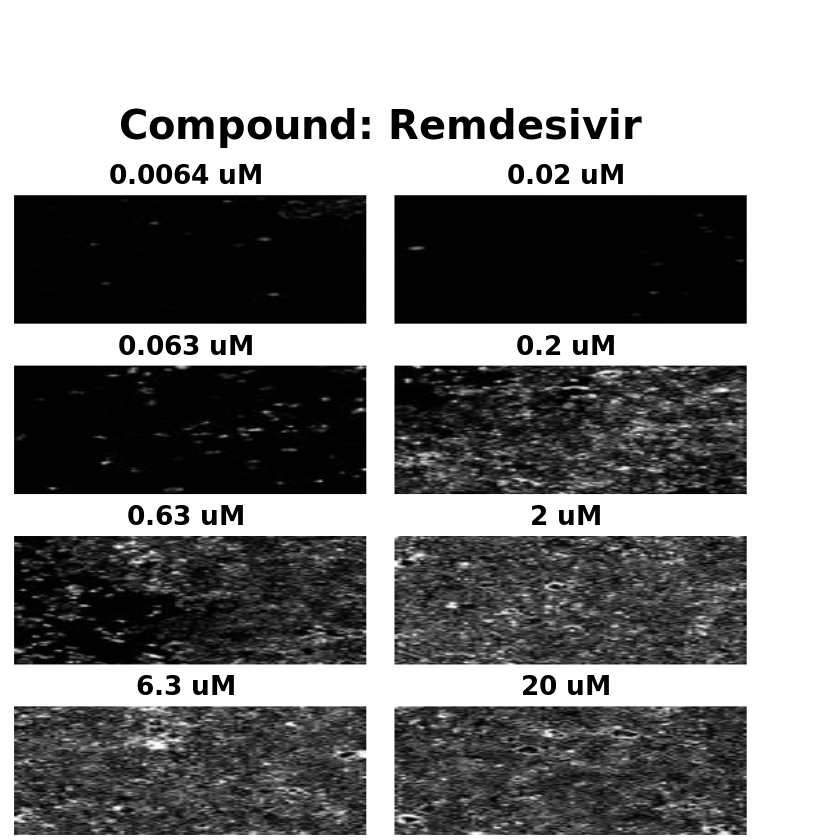

In [14]:
cols <- 2
n <- nrow(data)
m <- 4
par(mfrow = c(m, cols))
par(mar=c(0,0,2,0))
par(oma=c(0,0,10,5))
values <- vector()
for(i in 1:n) {
    row <- data[i,]
    if (!is.element(row$Concentration, values)) {
        values <- c(values, row$Concentration)
        url <- paste(WELLS_URL, toString(row$Well), "/", sep="")
        #  load images linked to the well
        wells_dataframe <- as.data.frame(jsonlite::fromJSON(url))
        value <- get("@id", wells_dataframe$data.WellSamples.Image[2])
        id_strings <- strsplit(as.character(value), " ")
        id <- id_strings[c(1)]
        # load one thumbnail
        thumb_url <- paste(THUMB_URL, id, "/96/96/", sep="")
        name = paste("/tmp/", id, ".jpeg", sep="")
        download.file(thumb_url, name)
        thumb <- jpeg::readJPEG(name)
        plot(0:1, 0:1, type="n", ann=FALSE, axes=FALSE)
        rasterImage(thumb, 0, 0, 1, 1)
        title(paste(row$Concentration, 'uM '), font.main=2, cex.main=2)
    }
}
mtext(paste("Compound:", compoundName), outer = TRUE, font=2, cex=2, side=3, line=1)

## Calculate the half maximal inhibitory concentration IC50

The half maximal inhibitory concentration (IC50) is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. IC50 is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%.

In [15]:
calculate_IC50 <- function(data){
  IC50 <- NA
  data.LL.4 <- NULL
  ctest <- filter(data, Inhibition != "NaN")
  data.LL.4 <- drm(Inhibition ~ Concentration, data = ctest, fct = LL.4(), control = drmc(errorm=FALSE))
  if (is.null(data.LL.4$convergence)) {
      IC50 <- ED(data.LL.4, 50, interval = "delta")[1]
  }
  returned_values <- list("ic50" = IC50, "data" = data.LL.4)
}

In [16]:
values <- calculate_IC50(data)
IC50 <- values$ic50
IC50


Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.80772    0.12019 0.55701 1.05842


[1] 0.8077159

## Plot the Dose Response curve 

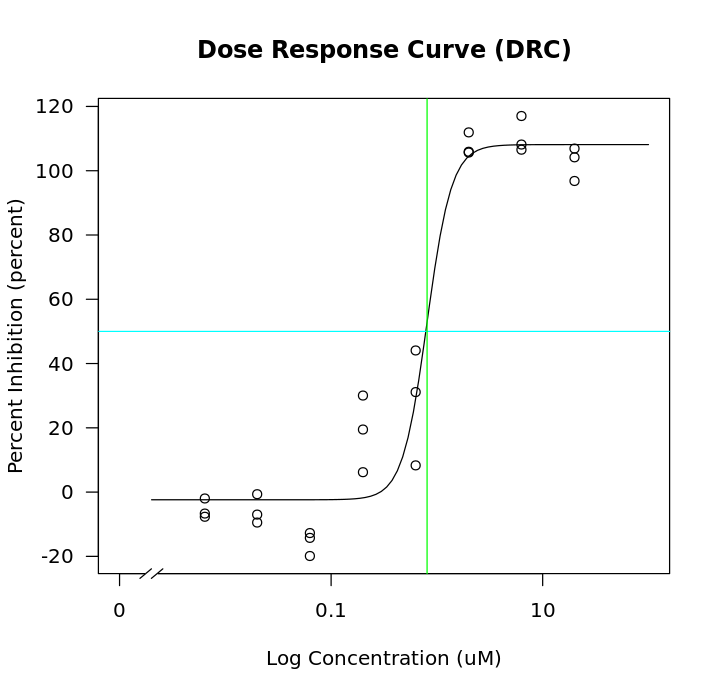

In [17]:
options(repr.plot.width=6, repr.plot.height=5.8)
plot(values$data, broken = TRUE, type = "all",
     main = "Dose Response Curve (DRC)", xlim = c(0, 100),
     xlab = "Log Concentration (uM)",
     ylab = "Percent Inhibition (percent)")
abline(h = 50, col = "cyan")
abline(v = IC50, col = "green")

## Determine IC50 for each compound

For each unique compound, determine the IC50.

In [18]:
compounds <- unique(as.vector(df["CompoundName"]))

In [19]:
ic <- vector()
cn <- vector()
for(i in 1:nrow(compounds)) {
    c <- toString(compounds[i,])
    if (c != "") {
      d <- filter_data(df, c) 
      results <- calculate_IC50(d)
      ic <- c(ic, results$ic50)
      cn <- c(cn, c)
    }
}

result <- data.frame(cn, ic)
x <- c("Compound Name", "IC50 (uM)")
colnames(result) <- x


Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1267.81     491.19  243.22 2292.41

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  186.510    119.447 -62.651 435.672

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   261.22    4491.46 -9107.80  9630.24

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.019343   0.028943 -0.041032  0.079718

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2220765         10 2220744 2220786

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.53396    0.59522 -0.70765  1.77556

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.22078    0.53177 -0.88847  1.33003

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   10.701     14.985 -20.556  41.959

Estimated effective doses

       Estimate Std. Error   Lower   U

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   17.291         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   14.877     25.257 -37.809  67.563

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   5.4794     1.2597 2.8516 8.1072

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  33.7614    19.9285 -7.8087 75.3316

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   37.893     76.764 -122.234  198.020

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   12.655     26.495 -42.611  67.922

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   21.788    165.960 -324.398  367.975

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50   0.10088    5.28788 -10.92945  11.13120

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   24.634         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   53.664     37.029 -23.577 130.905

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0091142  0.0332481 -0.0602402  0.0784686

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   74.106    329.029 -612.238  760.449

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.80772    0.12019 0.55701 1.05842

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  53.6962    22.5873   6.5798 100.8125


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   19.868         NA    NA    NA

Estimated effective doses

          Estimate  Std. Error       Lower       Upper
e:1:50  0.00034673  0.00029747 -0.00027378  0.00096724

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   319850     165981 -26380 666081

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.698196   0.375376 -0.084825  1.481217

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.60122    0.19930 0.18548 1.01695

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.99782    3.80204 -6.93309  8.92874


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   24.618         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   892.58     246.43  378.54 1406.62

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50    165.7     1147.2 -2227.3  2558.7

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   36.959     39.159 -44.726 118.644

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.49737    0.41405 -0.36632  1.36106

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   7.8928     8.1723 -9.1544 24.9400

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   1.0297     7.8949 -15.4388  17.4983

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.49020    0.35134 -0.24267  1.22308

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  176.2

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.5865    35.6536 -70.7856  77.9587


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   27.963         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    1.2769    93.7966 -194.3794  196.9331

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.63788    0.15115 0.32260 0.95317

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    85.896   1251.735 -2525.176  2696.969

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   64.740     57.199 -54.576 184.055


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50  0.34338         NA    NA    NA
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 119.8623    60.8007  -6.9656 246.6902

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   35.173     27.180 -21.524  91.870

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.27919    0.74247 0.73042 3.82796

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.2261410  0.1089551 -0.0011353  0.4534173

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    31.838   1036.961 -2131.225  2194.900

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   2.7525    15.4320 -29.4380  34.9431

Estimated effective doses

          Estimate  Std. Error       Lower       Upper
e:1:50  0.00048621  0.01539445 -0.03162606  0.03259847

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.32167    1.04925 0.13297 4.51036

Estimated effective doses

  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

        Estimate Std. Error Lower Upper
e:1:50 0.0014348         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   41.492    475.541 -950.468 1033.453

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.209955   0.144748 -0.081765  0.501675

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   21.383    157.485 -307.125  349.890

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.047737   0.066759 -0.086807  0.182281

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  2.35611    1.51879 -0.81203  5.52426

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   7.1624     6.6632 -6.7368 21.0616

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.71463    0.83748 -1.03233  2.46159

Estimated effective doses

        Estimate Std. Error   

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   4.5232         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   103.49     670.94 -1296.06  1503.04

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   7.5074     9.7635 -12.8588  27.8737

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   3.6106     5.5224 -7.9089 15.1301

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  5.86231    2.50310  0.64092 11.08369

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.12568    0.66533 0.73782 3.51353
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”


Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.210047   0.046302 0.113464 0.306631

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   5.0619     6.7510 -9.0205 19.1443

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.50252    0.92902 -1.43539  2.44043

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.16687    0.23765 -0.32885  0.66259

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.313973   0.161075 -0.022024  0.649971

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.63602    0.09640 0.43493 0.83710

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.77965    0.42175 -0.10011  1.65941

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   2.5549    16.1508 -31.1351  36.2449

Estimated effective doses

       Estimate Std. Error   L

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   30.763         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    88.982    821.372 -1624.370  1802.334

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.7652     2.4616 -2.3697  7.9001

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   25.064    130.323 -246.786  296.914

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1.90165    0.56720 0.71848 3.08482


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50    29.81         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1.12397    0.44785 0.18978 2.05817

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.10770    0.36432 1.34775 2.86765

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.023305   0.052935 -0.087115  0.133724


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

        Estimate Std. Error Lower Upper
e:1:50 0.0036162         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   5.6584     3.5469 -1.7404 13.0572

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   29.082     59.840 -95.742 153.906

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   30.973     49.583 -72.456 134.402

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50    373.5     3985.3 -7939.8  8686.8

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   20.879     44.851 -72.678 114.436

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.059864   2.264487 -4.663774  4.783502


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   11.859         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  180.900     62.867  49.761 312.039

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.869297   0.071566 0.720012 1.018581

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.40975    0.24613 -0.10366  0.92316

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0007475  0.0064975 -0.0128060  0.0143010


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   36.026         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.31265    0.86213 0.51429 4.11102

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.199299   0.033686 0.129031 0.269566
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.040043   0.010978 0.017144 0.062942

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.5706    13.3817 -24.3432  31.4844

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   1.1072     4.7264 -8.7520 10.9663

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.86353    0.93472 -1.08626  2.81333

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.4879    19.1401 -36.4376  43.4134

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   132.84     185.53 -254.16  519.84

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   420.25     591.60 -813.81 1654.32

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  7.05996    3.25687  0.26625 13.85368

Estimated effective doses

       Estimate Std. Error    Lower    U

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.63204    0.10701 0.40883 0.85525

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    88.025    555.859 -1071.476  1247.526

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0028463  0.0052160 -0.0080341  0.0137267

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   35.859     80.087 -131.199  202.917

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   6.4439    28.8165 -53.6664  66.5541

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   5.6241     1.5524 2.3859 8.8622

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.655141   0.266739 0.098734 1.211548

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   29.767    192.575 -371.938  431.472

Estimated effective doses

       Estimate Std. E

Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   189.46     668.97 -1205.98  1584.90

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   12.803     30.325 -50.454  76.060

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   7.1252     7.3468 -8.1999 22.4502


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   56.549         NA    NA    NA

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   3.9621     1.4153 1.0097 6.9144

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.078577   0.502591 -0.969811  1.126964

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   0.3538     3.4290 -6.7990  7.5066

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.5457     1.6494 -0.8948  5.9863

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  1.11441    0.96745 -0.90365  3.13248


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   23.302         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50    29.89         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   3.1753     6.3050 -9.9767 16.3274

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50    0.54514   49.97715 -103.70537  104.79565

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   5.3576     1.5454 2.1338 8.5813

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  2.18273    1.16508 -0.24758  4.61304

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   4.0109    11.2247 -19.4034  27.4251

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.7560     3.0348 -3.5744  9.0865

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  6.16231    0.26833 5.60259 6.72204

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:5

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   20.625         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   6.7599     3.7834 -1.1322 14.6521

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  4.29410    2.02106 0.07825 8.50996

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.189615   0.117624 -0.055744  0.434974

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50    8.126    391.193 -807.888  824.140

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    9.4193    71.5937 -139.9226  158.7612


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50 0.033896         NA    NA    NA

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0074887  0.0317909 -0.0588258  0.0738033

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   3.5635     6.0210 -8.9961 16.1232

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   3.7456     8.0798 -13.1086  20.5997

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  4.91922    0.77882 3.29463 6.54382

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    24.548   2504.058 -5198.825  5247.920

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   36.623    119.166 -211.953  285.199

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  3.32105    1.34094 0.52388 6.11821


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   61.321         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   22.749         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   90.206     60.940 -36.913 217.325

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50   0.16463   29.82835 -62.05620  62.38547
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.32111    0.51790 -0.75920  1.40142


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50  0.12821         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   271.52    1049.18 -1917.03  2460.07

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   515.83     570.01 -673.20 1704.85

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    39.001    567.956 -1145.734  1223.736

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.023211   0.037989 -0.056033  0.102454

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  6.19954    0.39739 5.37061 7.02848

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50  0.0087279  0.0163325 -0.0253411  0.0427968

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  1451.17     753.25 -120.09 3022.44

Estimated effective doses

       Estimate Std. Error  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   31.241         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   26.352         NA    NA    NA

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   6.0862     1.2435 3.4923 8.6801

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   23.753    260.151 -518.911  566.418

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.14459    0.16327 -0.19599  0.48516

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   107.61     656.57 -1261.98  1477.20

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50    28.17     110.75 -202.85  259.19

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  6.01826    2.58688  0.62213 11.41439
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   13.258     42.006 -74.365 100.882

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   26.955     64.319 -107.212  161.121

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.80066    0.61918 -0.49093  2.09226

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   28.484    146.405 -276.913  333.880

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.76591    0.68582 -0.66469  2.19651

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   6.6292     1.5790 3.3356 9.9229

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50    24.987    502.754 -1023.739  1073.712

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.018021   0.046302 -0.078564  0.114605

Estimated effective doses

       Estimate Std. Error  

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   15.884         NA    NA    NA

Estimated effective doses

       Estimate Std. Error  Lower  Upper
e:1:50   6.4999     1.1767 4.0454 8.9544

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   26.090     74.411 -129.129  181.309


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   9.2537         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   25.644         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  24.3175    10.5228  2.3674 46.2676

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  3.773570   1.825737 -0.034851  7.581991

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   8.1272     8.5130 -9.6306 25.8851

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  58.5498    27.0595   2.1046 114.9950

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   21.161    320.266 -646.901  689.224

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   31.975     34.777 -40.568 104.518

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  4.51027    0.80275 2.83576 6.18478

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   31.749         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50  0.11352    0.11798 -0.13258  0.35962

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   32.273     85.559 -146.199  210.745

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   6.2897     6.1504 -6.5399 19.1193

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.4306     3.4507 -4.7674  9.6286


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   31.117         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50   0.37145   16.31267 -33.65618  34.39908

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   300.33     227.83 -174.91  775.57

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   340.47    4387.25 -8811.18  9492.11

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   50.945    415.651 -816.088  917.977
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [4]


Warning message:
“Convergence failed. The model was not fitted!”



Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   4.6905     3.7407 -3.1125 12.4935

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   1.3828     1.3951 -1.5272  4.2928

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   86.367    222.053 -376.828  549.562

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   627.02    1389.38 -2271.18  3525.21


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50    44.36         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   28.027         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.025408   0.025974 -0.028773  0.079589

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   141.05     963.23 -1868.22  2150.31

Estimated effective doses

         Estimate Std. Error      Lower      Upper
e:1:50     2.2111  1264.0822 -2634.6182  2639.0404

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   99.189     24.091  48.937 149.441

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  2.13762    0.86737 0.32832 3.94691

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   32.416    142.795 -265.449  330.280

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   60.333     48.385 -40.598 161.263

Estimated effective doses

       Estimate Std. Error    Lowe

Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   38.721         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   42.155    122.177 -212.702  297.012

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   2.4361     8.7074 -15.7273  20.5995


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   464.42         NA    NA    NA

Estimated effective doses

          Estimate  Std. Error       Lower       Upper
e:1:50  0.00067741  0.00480294 -0.00934134  0.01069616

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50  0.79416    0.23168 0.31089 1.27743

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   14.275     19.762 -26.947  55.498


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   25.226         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   257.01    1520.62 -2914.96  3428.97

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   266.31    1227.07 -2293.30  2825.93


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   17.706         NA    NA    NA


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   29.215         NA    NA    NA

Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:50   2.4394     5.0964 -8.1914 13.0703


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   23.725         NA    NA    NA

Estimated effective doses

        Estimate Std. Error     Lower     Upper
e:1:50  0.045198   0.046042 -0.050844  0.141239

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.060911   0.022545 0.013883 0.107939


Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”
Warning message in sqrt(dEDval %*% varCov %*% dEDval):
“NaNs produced”



Estimated effective doses

       Estimate Std. Error Lower Upper
e:1:50   23.642         NA    NA    NA

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.439486   0.175178 0.074072 0.804900

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50 0.198092   0.020338 0.155667 0.240518

Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:50   28.972    486.059 -984.931 1042.874


## Export result as CSV

Write the calculated IC50 result into a CSV file. The CSV file is first created in the ``home`` directory. The CSV file can then be downloaded to your local machine. To download it, click ``File > Open``, navigate to the ``home`` directory (click onto the folder icon in top-left corner), select the CSV file and open it, then click ``File > Download``.

In [20]:
setwd(path.expand('~'))
write.csv(result, "ic50.csv")

### License

Copyright (C) 2021 University of Dundee. All Rights Reserved. This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA. 